# New reference state support

### First set up a Database and Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, Model, calculate

CR_FE_BCC_MAGNETIC_DBF = Database("""
ELEMENT CR BLANK 0 0 0 !
ELEMENT FE BLANK 0 0 0 !

FUNCTION GHSERCR 298.15 -1.47721E-6*T**3 + 0.00189435*T**2 - 26.908*T*LN(T) +
   157.48*T - 8856.94 + 139250*T**(-1); 2180.0 Y -50*T*LN(T) + 344.18*T -
   34869.344 - 2.88526E+32*T**(-9); 6000.0 N !
FUNCTION GHSERFE 298.15 -5.8927E-8*T**3 - 0.00439752*T**2 - 23.5143*T*LN(T) +
   124.134*T + 1225.7 + 77359*T**(-1); 1811.0 Y -46*T*LN(T) + 299.31255*T -
   25383.581 + 2.29603E+31*T**(-9); 6000.0 N !

FUNCTION GBCCCR 298.15 GHSERCR#; 6000.0 N !
FUNCTION GBCCFE 298.15 GHSERFE#; 6000.0 N !

TYPE_DEFINITION % SEQ * !
DEFINE_SYSTEM_DEFAULT ELEMENT 2 !
DEFAULT_COMMAND DEFINE_SYSTEM_ELEMENT VA !

TYPE_DEFINITION & GES A_P_D BCC_A2 MAGNETIC -1.0 0.4 !

PHASE BCC_A2 %&  1 1 !
CONSTITUENT BCC_A2 :CR,FE: !

PARAMETER G(BCC_A2,CR;0) 1 GBCCCR#; 10000 N !
PARAMETER G(BCC_A2,FE;0) 1 GBCCFE#; 10000 N !

PARAMETER TC(BCC_A2,CR;0) 298.15 -311.50; 6000 N !
PARAMETER BM(BCC_A2,CR;0) 298.15 -0.008; 6000 N !

PARAMETER TC(BCC_A2,FE;0) 298.15 1043; 6000 N !
PARAMETER BM(BCC_A2,FE;0) 298.15 2.22; 6000 N !

PARAMETER L(BCC_A2,CR,FE;0) 1 1000; 10000 N !

""")

comps = ['CR', 'FE']
# by default, Model has surface of reference, magnetic and Einstein energy as the reference state
mod = Model(CR_FE_BCC_MAGNETIC_DBF, comps, 'BCC_A2')


### Set up a comparison function

In [2]:
def compare_model_contributions(dbf, comps, phase, mod):
    
    print('Reference contributions: {}'.format(mod.reference_contributions))

    calc_res = calculate(dbf, comps, 'BCC_A2', output='GM', model={'BCC_A2': mod})
    plt.scatter(calc_res.X.sel(component='FE').values.squeeze(), calc_res.GM.values.squeeze())
    plt.xlabel('X(FE)')
    plt.ylabel('Gibbs energy')
    plt.title('Gibbs energy')
    plt.show()

    calc_res = calculate(dbf, comps, 'BCC_A2', output='GM_MIX', model={'BCC_A2': mod})
    plt.scatter(calc_res.X.sel(component='FE').values.squeeze(), calc_res.GM_MIX.values.squeeze())
    plt.xlabel('X(FE)')
    plt.ylabel('Gibbs energy of mixing')
    plt.title('Gibbs energy of mixing')
    plt.show()
    
    calc_res = calculate(dbf, comps, 'BCC_A2', output='REF', model={'BCC_A2': mod})
    plt.scatter(calc_res.X.sel(component='FE').values.squeeze(), calc_res.REF.values.squeeze())
    plt.xlabel('X(FE)')
    plt.ylabel('Reference energy')
    plt.title('Reference energy')
    plt.show()

### Plot the new default reference state

Reference contributions: ['surf_ref', 'mag', 'ein']


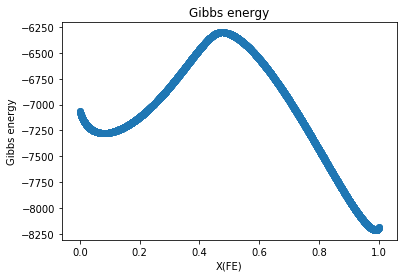

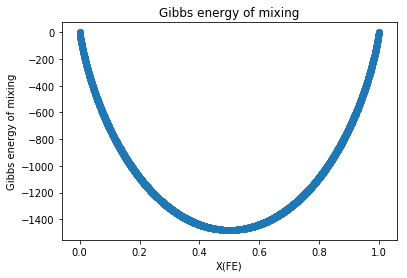

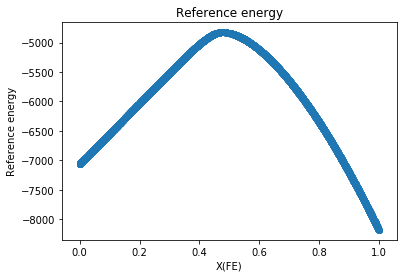

In [3]:
compare_model_contributions(CR_FE_BCC_MAGNETIC_DBF, comps, 'BCC_A2', mod)


### Change the reference state to only include the surface of reference (like it currently is)

Notice that we only have to change the property  of the instance. Really great if users want to change reference state stuff on the fly and not have to trigger JIT again.

Reference contributions: ['surf_ref']


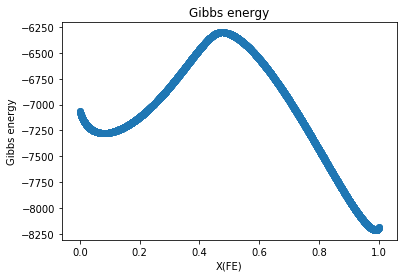

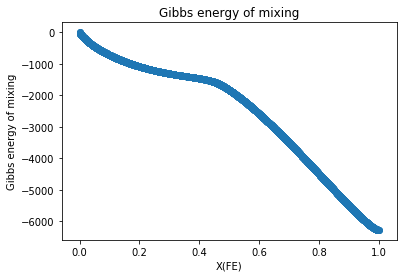

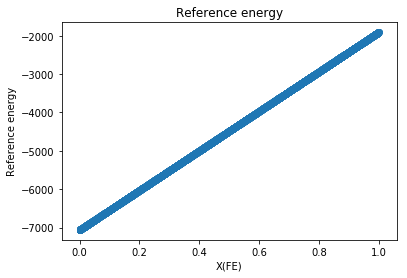

In [4]:
mod.reference_contributions = ['surf_ref']

compare_model_contributions(CR_FE_BCC_MAGNETIC_DBF, comps, 'BCC_A2', mod)

### We can also override at Model instantiation

Reference contributions: ['surf_ref']


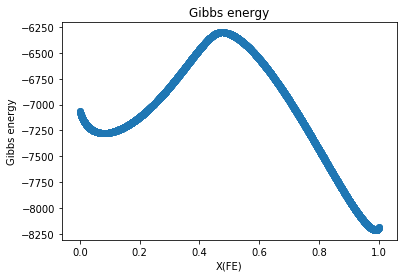

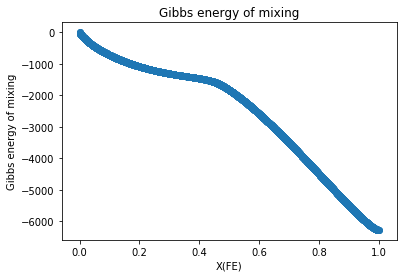

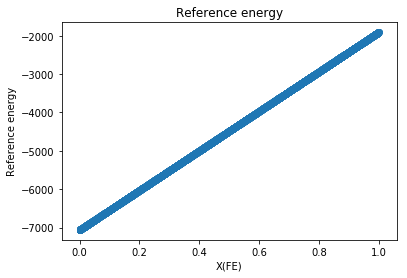

In [5]:
model_surf_ref_only = Model(CR_FE_BCC_MAGNETIC_DBF, comps, 'BCC_A2', reference_contributions=['surf_ref'])
compare_model_contributions(CR_FE_BCC_MAGNETIC_DBF, comps, 'BCC_A2', model_surf_ref_only)